# Thermo-mechanical NTFA: Examples from paper

## Imports:

In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Twoscale loading plot:

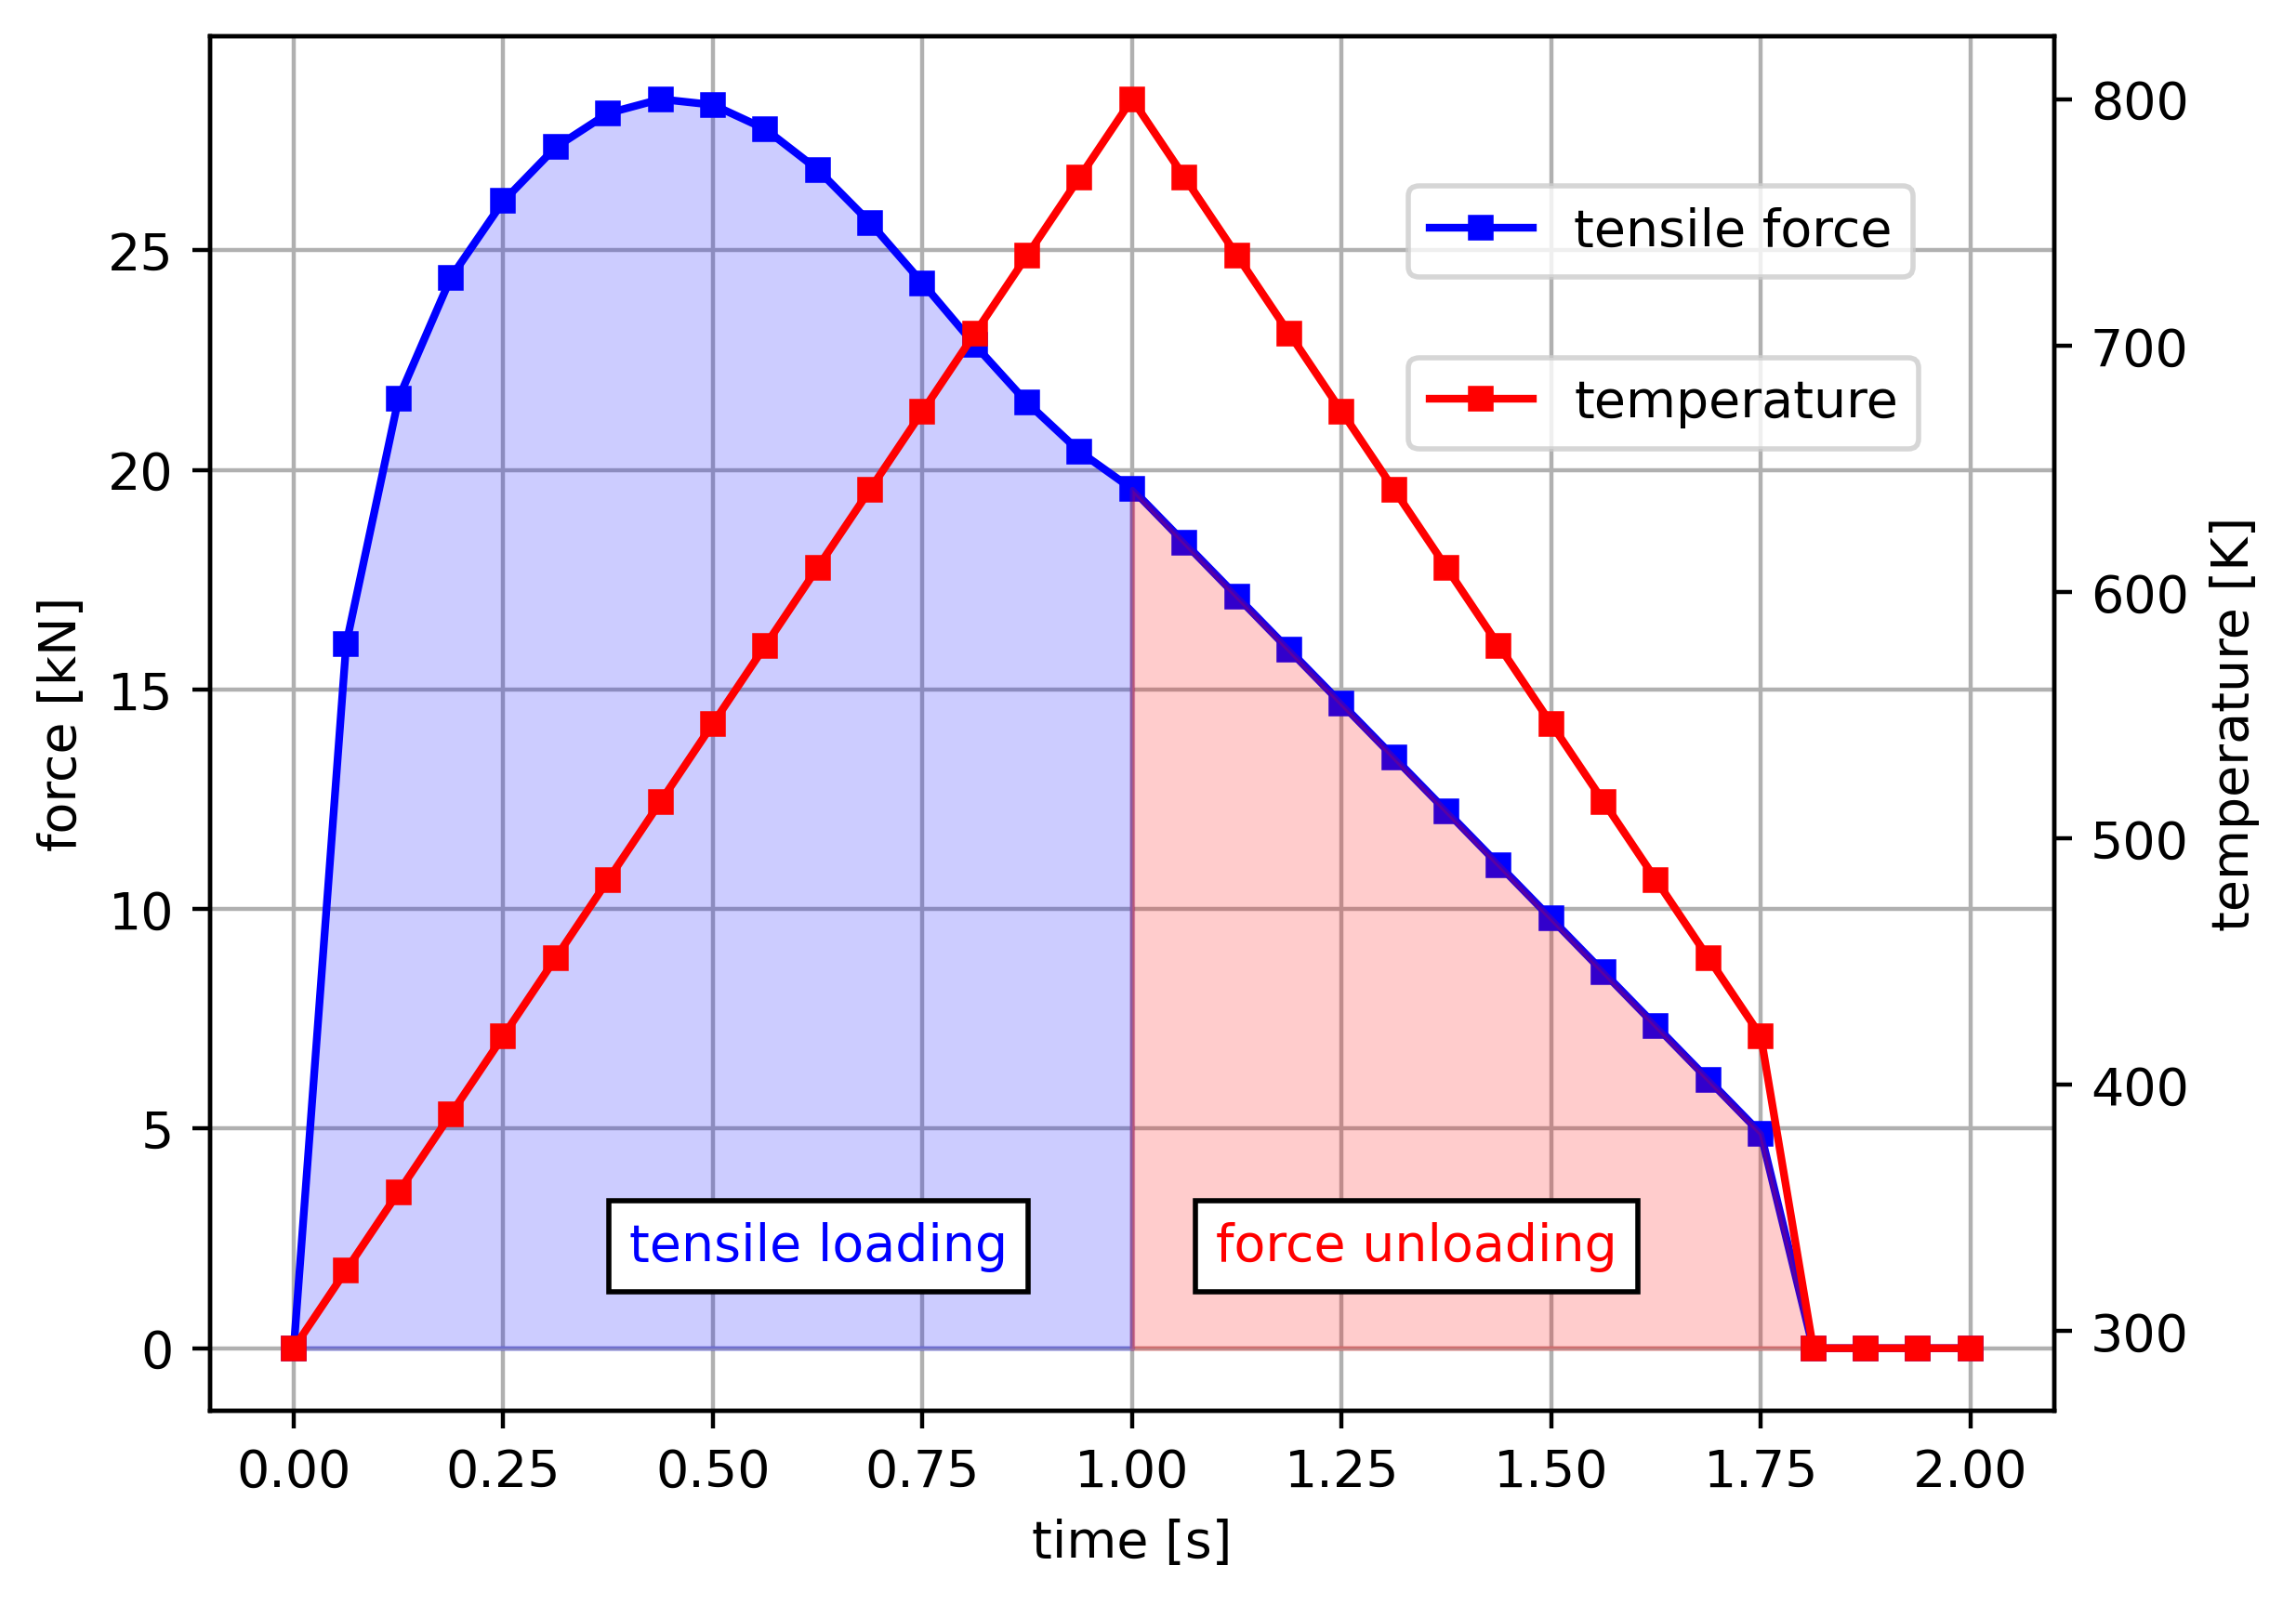

In [2]:
dpi = 400
force = []
temp = []
for s in ('fine',):  # 'coarse', 'medium', 
    file_name = os.path.join("data", f"NTFA293K_{s}_temp_293-800.h5")
    with h5py.File(file_name, mode="r") as F:
        force.append(np.array(F["force28"])/1e6)
        temp.append(np.array(F["temperature28"]))

fig, ax = plt.subplots(1, 1, dpi=dpi)
labels = False
for f, T in zip((force), (temp)):
    t = np.linspace(0, 2, f.size)
    ax.plot(t, f, '-s', ms=4, label='tensile force', color='blue')
    if( labels ):
        ax.plot(1.0, f[np.where(t==1.0)], 'o', color='black', ms=6)
    else:
        ax2 = ax.twinx()
        nhalf = int( (t.size+1)/2)
        # ax.plot(1.0, f[np.where(t==1.0)], 'o', color='black', ms=6, label='start unloading', zorder=4)
        ax.fill_between( t[:nhalf], f[:nhalf], np.zeros(nhalf), color='blue', alpha=0.2, zorder=2)
        ax.fill_between( t[(nhalf-1):], f[(nhalf-1):], np.zeros(f.size-nhalf+1), color='red', alpha=0.2, zorder=2)
        ax2.plot(t, T, '-s', ms=4, color='red', zorder=4, label='temperature')
        ax.set_xlabel('time [s]')
        ax.set_ylabel('force [kN]')
        ax2.set_ylabel('temperature [K]')
        ax.text(0.4, 2, 'tensile loading', color='blue', bbox=dict(facecolor='white'))
        ax.text(1.1, 2, 'force unloading', color='red', bbox=dict(facecolor='white'))
        ax.grid(zorder=1)
        ax.legend(loc=(0.65,0.825))
        ax2.legend(loc=(0.65,0.7))
    nhalf=int((t.size+1)/2)
    labels = True
fig.savefig(os.path.join("results", "twoscale_loading.pdf"))
plt.show()

## Plot 2:

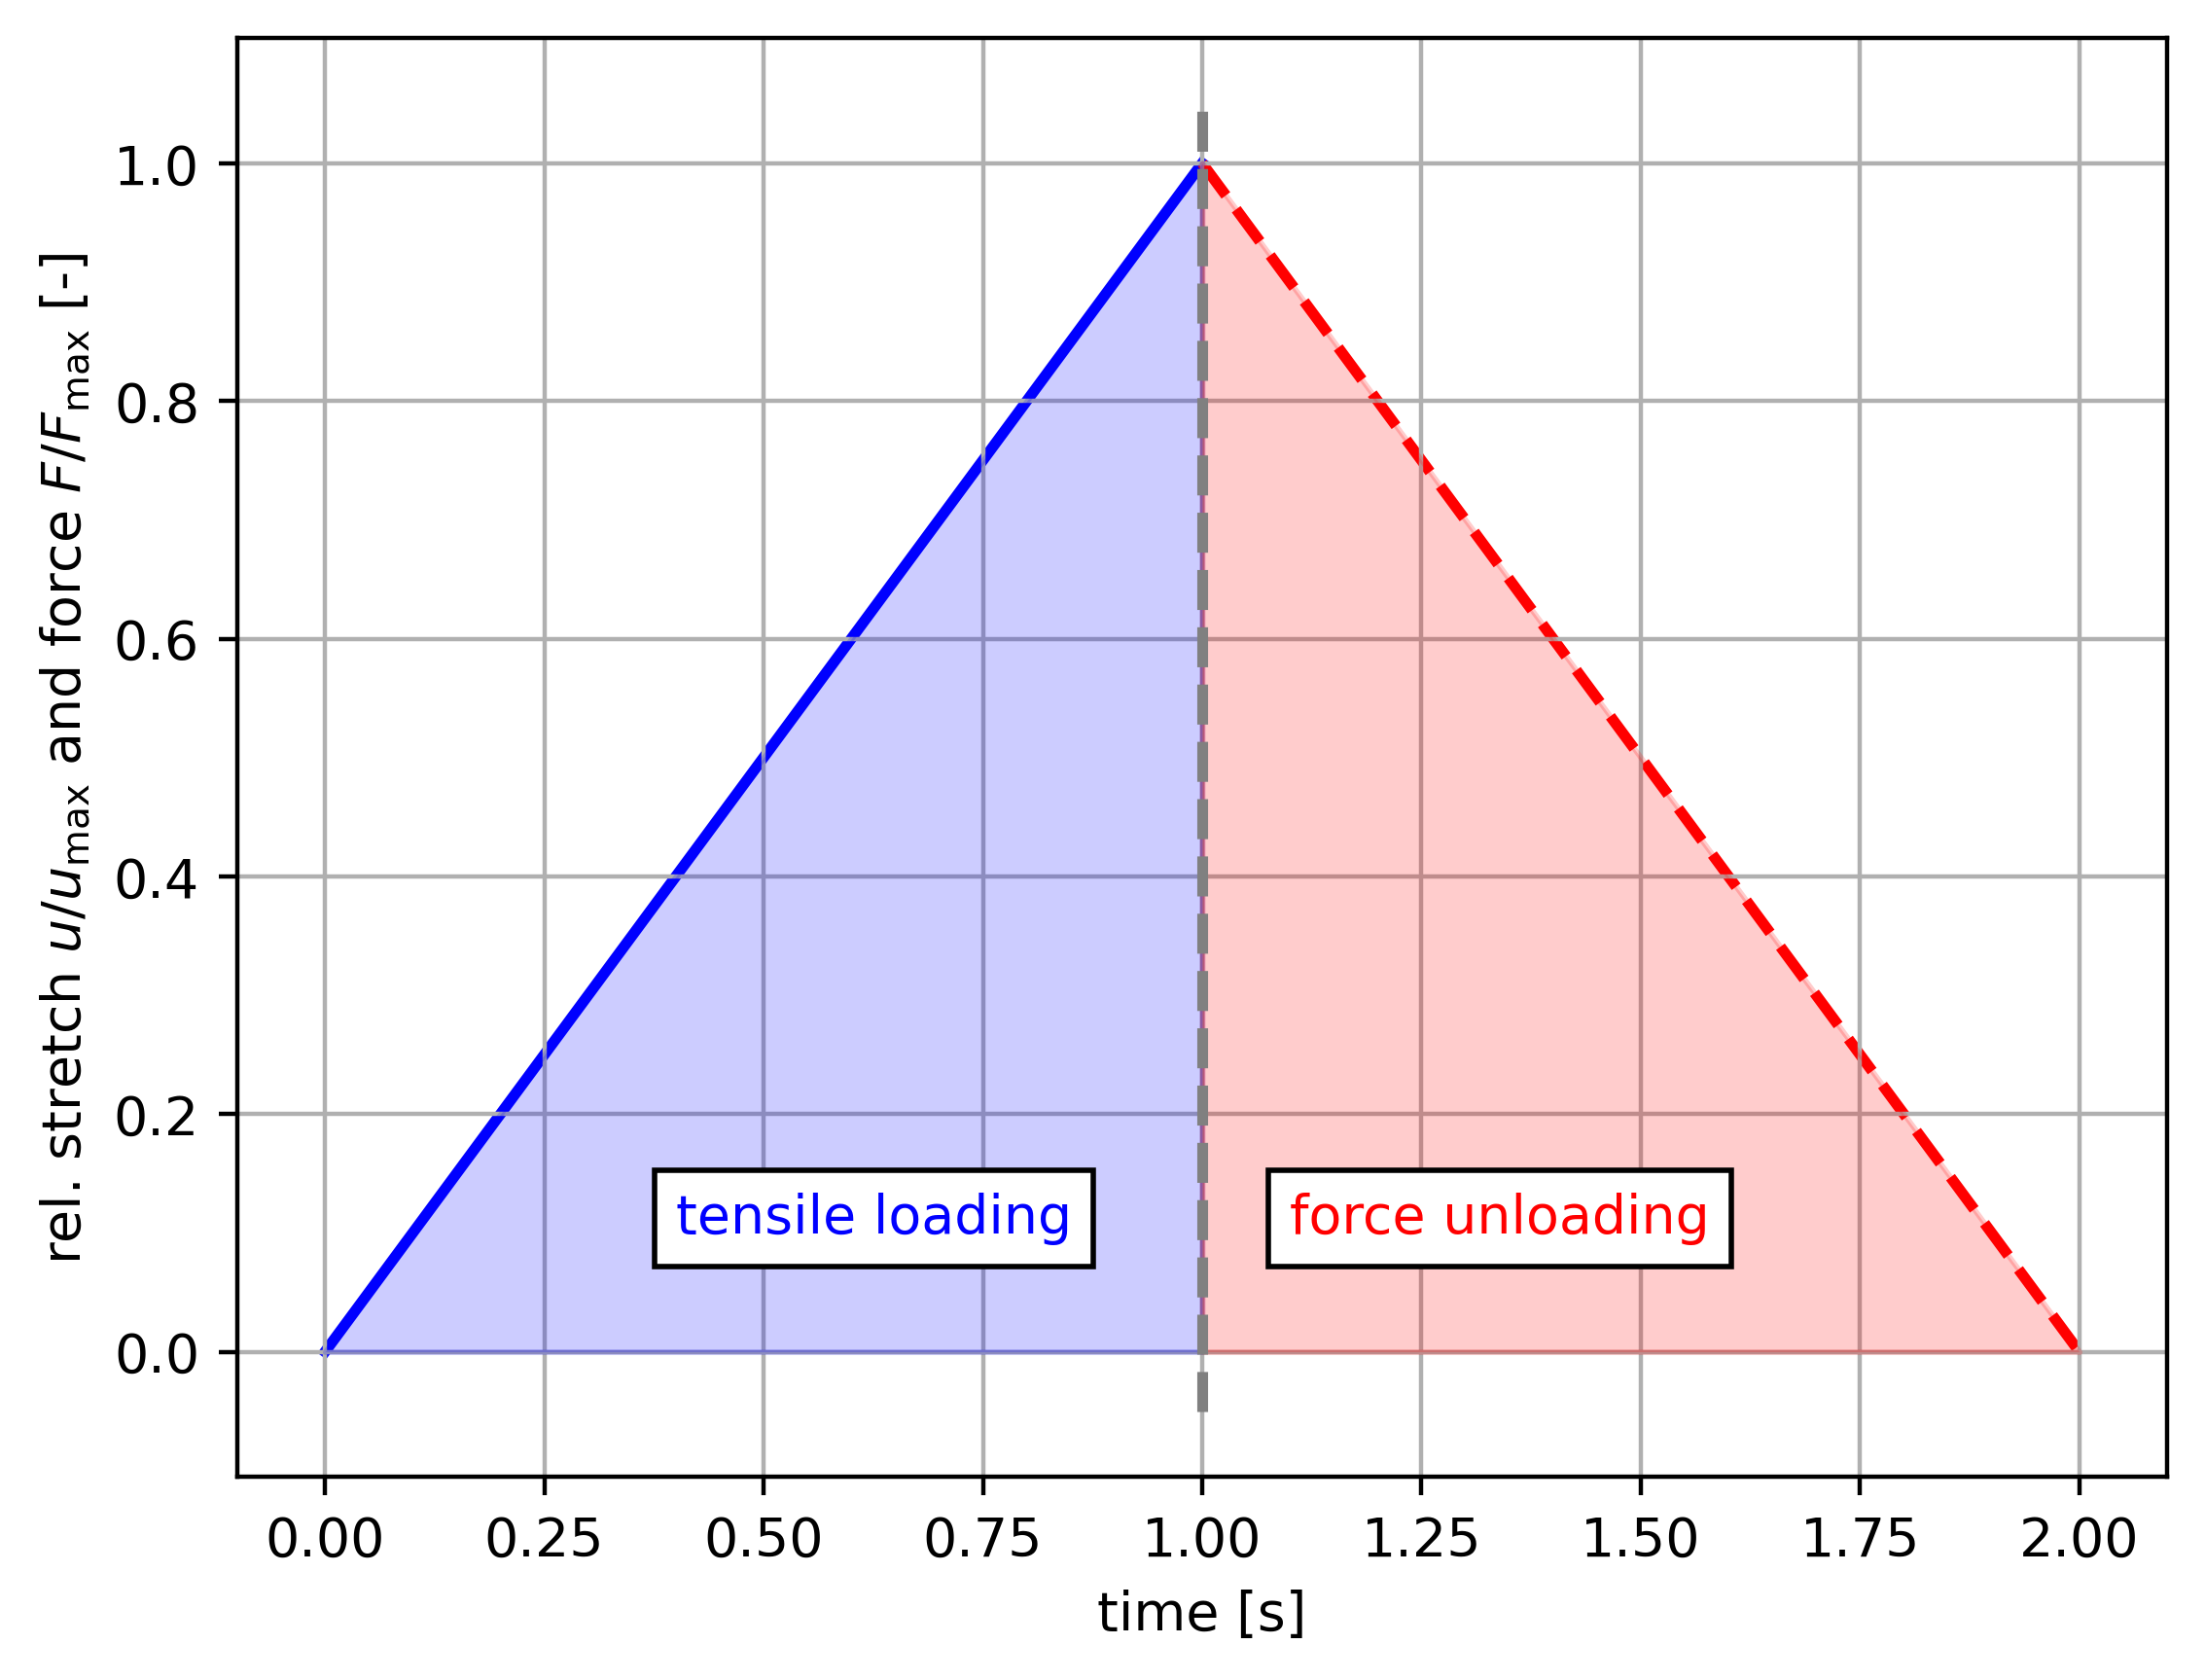

In [3]:
fig, ax = plt.subplots(1, 1, dpi=dpi)
ax.plot((1., 1.), (-0.05, 1.05), '--', color='gray', lw=2, zorder=4)
ax.fill_between((0., 1.), (0., 1.), (0., 0.), color='blue', alpha=0.2, zorder=2)
ax.fill_between((1., 2.), (1., 0.), (0., 0.), color='red', alpha=0.2, zorder=2)
ax.plot((0., 1.), (0., 1.), color='blue', lw=2, zorder=1)
ax.plot((1., 2.), (1., 0.), '--', color='red', lw=2, zorder=1)
ax.text(0.4, 0.1, 'tensile loading', color='blue', bbox=dict(facecolor='white'))
ax.text(1.1, 0.1, 'force unloading', color='red', bbox=dict(facecolor='white'))
ax.set_xlabel('time [s]')
ax.set_ylabel(r'rel. stretch $u/u_\mathrm{max}$ and force $F/F_\mathrm{max}$ [-]')
ax.grid(zorder=3)
fig.savefig(os.path.join("results", "twoscale_loading.pdf"))
plt.show()

## Plot:

In [4]:
file_name = os.path.join("data", f"test_coarse.h5")
with h5py.File(file_name, mode="r") as F:
    u = np.array(F["displacement1/X"])
    uy = u[1::2]
    D = np.array(F["DATA16/cData"]).reshape((-1, 12))
    eps = D[:,:6]
    sig = D[:,:6]
    print("uymax=", uy.max())
    print('s_yy mean=', sig[:,2].mean())
    f=np.array(F["force16"])[:17]
    plt.plot(f)
    plt.show()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/test_coarse.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Plot:

In [ ]:
file_name = os.path.join("data", f"test_coarse.h5")
with h5py.File(file_name, mode="r") as F:
    d=[]
    for i in range(16):
        D = np.array(F[f"DATA{i+1}/cData"])[:,6:]
        d.append(D.mean(axis=0))
    d=np.array(d)
    plt.plot(d[:,2])

    # f = np.array(F["force32"])
    # print(f)
    # plt.plot(f)
    plt.show()